In [10]:


import os
from PyPDF2 import PdfReader
import spacy
from gensim import corpora, models

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

# Directory containing PDF files
pdf_dir = "C:/Users/SwapnilSingh/OneDrive - ProcDNA Analytics Pvt. Ltd/Desktop/Demo/DD"

# List to store extracted text from PDFs
pdf_texts = []

# Loop through PDF files
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_dir, filename)
        text = extract_text_from_pdf(pdf_path)
        pdf_texts.append(text)

In [11]:
import string
def preprocess_text(text):
    # Tokenization and lemmatization using SpaCy
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    return tokens

# Preprocess text for each PDF
processed_texts = [preprocess_text(text) for text in pdf_texts]

In [13]:
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Print the type of dictionary
print(type(dictionary))

# Print the number of words in the dictionary
print("Number of words:", len(dictionary))

# Print the first few words along with their numerical IDs
for num in range(5):
    print(num, dictionary[num])

<class 'gensim.corpora.dictionary.Dictionary'>
Number of words: 5232
0 aballay
1 abbreviations
2 able
3 abnormality
4 acad


In [14]:
print("Dictionary entry 41:", dictionary[41])
print("Dictionary entry 189:", dictionary[189])
print("Document length:", len(next(iter(corpus))))
print("First document in BoW format:", next(iter(corpus)))

Dictionary entry 41: aim
Dictionary entry 189: carballal
Document length: 1533
First document in BoW format: [(0, 1), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 3), (9, 1), (10, 1), (11, 3), (12, 2), (13, 4), (14, 1), (15, 1), (16, 1), (17, 4), (18, 6), (19, 1), (20, 1), (21, 1), (22, 3), (23, 3), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 5), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 27), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 4), (53, 1), (54, 1), (55, 4), (56, 6), (57, 1), (58, 30), (59, 8), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 3), (66, 41), (67, 1), (68, 1), (69, 2), (70, 5), (71, 1), (72, 2), (73, 1), (74, 1), (75, 3), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 5), (82, 3), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 2), (91, 14), (92, 2), (93, 12), (94, 2), (95, 6), (96, 1), (97, 1), (98, 1), (99,

In [16]:
num_docs = len(serialized_corpus)
print("Number of documents in the corpus:", num_docs)

Number of documents in the corpus: 6


In [17]:

# Serialize the corpus
corpora.MmCorpus.serialize("serialized_corpus.mm", corpus)

# Load serialized corpus
serialized_corpus = corpora.MmCorpus("serialized_corpus.mm")

# Check the number of documents in the corpus
num_docs = len(serialized_corpus)
print("Number of documents in the corpus:", num_docs)

# Directly index into the serialized corpus
print("First document:", serialized_corpus[0])

Number of documents in the corpus: 6
First document: [(0, 1.0), (1, 1.0), (2, 2.0), (3, 1.0), (4, 2.0), (5, 1.0), (6, 2.0), (7, 1.0), (8, 3.0), (9, 1.0), (10, 1.0), (11, 3.0), (12, 2.0), (13, 4.0), (14, 1.0), (15, 1.0), (16, 1.0), (17, 4.0), (18, 6.0), (19, 1.0), (20, 1.0), (21, 1.0), (22, 3.0), (23, 3.0), (24, 1.0), (25, 2.0), (26, 1.0), (27, 1.0), (28, 2.0), (29, 1.0), (30, 1.0), (31, 5.0), (32, 1.0), (33, 1.0), (34, 1.0), (35, 1.0), (36, 1.0), (37, 1.0), (38, 1.0), (39, 1.0), (40, 1.0), (41, 1.0), (42, 1.0), (43, 27.0), (44, 1.0), (45, 1.0), (46, 2.0), (47, 1.0), (48, 1.0), (49, 1.0), (50, 2.0), (51, 1.0), (52, 4.0), (53, 1.0), (54, 1.0), (55, 4.0), (56, 6.0), (57, 1.0), (58, 30.0), (59, 8.0), (60, 1.0), (61, 1.0), (62, 1.0), (63, 3.0), (64, 1.0), (65, 3.0), (66, 41.0), (67, 1.0), (68, 1.0), (69, 2.0), (70, 5.0), (71, 1.0), (72, 2.0), (73, 1.0), (74, 1.0), (75, 3.0), (76, 2.0), (77, 1.0), (78, 1.0), (79, 1.0), (80, 1.0), (81, 5.0), (82, 3.0), (83, 1.0), (84, 1.0), (85, 1.0), (86, 1.

In [18]:
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Print all topics and their associated words
all_topics_words = lda_model.print_topics(num_topics=lda_model.num_topics)
for topic in all_topics_words:
    print(topic)

(0, '0.014*"ethanol" + 0.011*"astrocyte" + 0.011*"cell" + 0.007*"hemichannel" + 0.007*"mch" + 0.007*"induce" + 0.006*"channel" + 0.006*"µm" + 0.006*"al" + 0.006*"et"')
(1, '0.015*"layer" + 0.011*"network" + 0.010*"model" + 0.009*"conv" + 0.008*"deep" + 0.006*"training" + 0.006*"net" + 0.006*"residual" + 0.005*"fig" + 0.005*"error"')
(2, '0.030*"cme" + 0.012*"solar" + 0.012*"speed" + 0.011*"magnetic" + 0.010*"wind" + 0.005*"res" + 0.005*"geophys" + 0.005*"au" + 0.005*"flux" + 0.005*"mass"')


In [22]:
cv_topic_coherence = [0.75, 0.82, 0.69]  # Coherence scores corresponding to each topic
import pandas as pd
# Create DataFrame
lda_topics = [
    (0, '0.014*"ethanol" + 0.011*"astrocyte" + 0.011*"cell" + 0.007*"hemichannel" + 0.007*"mch" + 0.007*"induce" + 0.006*"channel" + 0.006*"µm" + 0.006*"al" + 0.006*"et"'),
    (1, '0.015*"layer" + 0.011*"network" + 0.010*"model" + 0.009*"conv" + 0.008*"deep" + 0.006*"training" + 0.006*"net" + 0.006*"residual" + 0.005*"fig" + 0.005*"error"'),
    (2, '0.030*"cme" + 0.012*"solar" + 0.012*"speed" + 0.011*"magnetic" + 0.010*"wind" + 0.005*"res" + 0.005*"geophys" + 0.005*"au" + 0.005*"flux" + 0.005*"mass"')
]
cols_lst = ['topic_num', 'topic_terms']
df = pd.DataFrame(data=lda_topics, columns=cols_lst)

# Set index
df.set_index(keys='topic_num', inplace=True)

# Add coherence values
df['cv_coherence'] = cv_topic_coherence

# Sort DataFrame by coherence values
df.sort_values(by=['cv_coherence'], inplace=True)

# Display DataFrame
print(df)

                                                 topic_terms  cv_coherence
topic_num                                                                 
2          0.030*"cme" + 0.012*"solar" + 0.012*"speed" + ...          0.69
0          0.014*"ethanol" + 0.011*"astrocyte" + 0.011*"c...          0.75
1          0.015*"layer" + 0.011*"network" + 0.010*"model...          0.82


In [33]:
# Iterate over each topic and print the terms
for t in range(lda_model.num_topics):
    print(lda_model.get_topic_terms(t))


[(2083, 0.013753054), (1646, 0.01135991), (205, 0.0107482085), (2266, 0.0074003777), (851, 0.0067954636), (683, 0.0067887064), (217, 0.0063118916), (1527, 0.006239299), (43, 0.006112365), (475, 0.0059719305)]
[(3736, 0.015418955), (3795, 0.011266309), (893, 0.009600848), (4141, 0.008553604), (3552, 0.007721554), (3991, 0.0064820056), (3793, 0.0062690475), (4407, 0.0059524695), (521, 0.0052512307), (465, 0.004810724)]
[(4622, 0.030181793), (4887, 0.012348599), (1330, 0.011672661), (4765, 0.011431888), (4942, 0.009570814), (1180, 0.0054097706), (4710, 0.0054033757), (1657, 0.00517959), (4699, 0.00493805), (4776, 0.0047105723)]


In [34]:
topic_dict={1:"Bio",2:"ML",3:"Phy"}
len(topic_dict), topic_dict

(3, {1: 'Bio', 2: 'ML', 3: 'Phy'})

In [29]:
import os

# Define the file path where you want to save the HTML visualization
pyldavis_fp = r"C:\Users\SwapnilSingh\OneDrive - ProcDNA Analytics Pvt. Ltd\Desktop\Demo\DD\pyldavis.html"

# Visualize the LDA model
if go_no_go == 0:
    lda_vis_serialized = pyLDAvis.gensim.prepare(lda_model, serialized_corpus, dictionary)
    pyLDAvis.save_html(lda_vis_serialized, pyldavis_fp)

# Display the file path
print(pyldavis_fp)


c:\Users\SwapnilSingh\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\Users\SwapnilSingh\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\Users\SwapnilSingh\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py:39: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
c:\Users\SwapnilSingh\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
c:\Users\SwapnilSingh\AppData\Local\Pro

C:\Users\SwapnilSingh\OneDrive - ProcDNA Analytics Pvt. Ltd\Desktop\Demo\DD\pyldavis.html


In [36]:
topic_dict={0:"Bio",1:"ML",2:"Phy"}
# Helper function to display the manually assigned topic designations for a document's topic vector
def get_topic_desig(doc_topics_lst, topic_dict):
    '''
    Translate the numerical topics in a '.get_document_topics' list into the assigned topic designation 
    '''
    descriptive_topic_lst = []
    
    for pr in doc_topics_lst:
        if pr[0] in topic_dict: 
            descriptive_topic_lst.append((topic_dict[pr[0]], pr[1]))
        else: 
            descriptive_topic_lst.append(('unassigned_topic', pr[1]))
    
    return descriptive_topic_lst

# Apply the get_topic_desig function to the document's topic vector
for doc_topics in lda_model.get_document_topics(corpus):
    descriptive_topics = get_topic_desig(doc_topics, topic_dict)
    print(descriptive_topics)


[('Bio', 0.9998283)]
[('Bio', 0.99991924)]
[('ML', 0.9997125)]
[('ML', 0.9997975)]
[('Phy', 0.9997174)]
[('ML', 0.999626)]


In [38]:
if 0 == go_no_go:
    # Calculate topic distribution for each document in the serialized corpus
    all_top_vecs = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in serialized_corpus]

    # Print the topic distribution for each document
    for doc_idx, doc_topics in enumerate(all_top_vecs):
        print(f"Document {doc_idx + 1}:")
        for topic, prob in doc_topics:
            print(f"Topic {topic}: {prob:.4f}")
        print()


Document 1:
Topic 0: 0.9998
Topic 1: 0.0001
Topic 2: 0.0001

Document 2:
Topic 0: 0.9999
Topic 1: 0.0000
Topic 2: 0.0000

Document 3:
Topic 0: 0.0001
Topic 1: 0.9997
Topic 2: 0.0001

Document 4:
Topic 0: 0.0001
Topic 1: 0.9998
Topic 2: 0.0001

Document 5:
Topic 0: 0.0001
Topic 1: 0.0001
Topic 2: 0.9997

Document 6:
Topic 0: 0.0002
Topic 1: 0.9996
Topic 2: 0.0002



Shape of all_top_vecs_array: (6, 3)


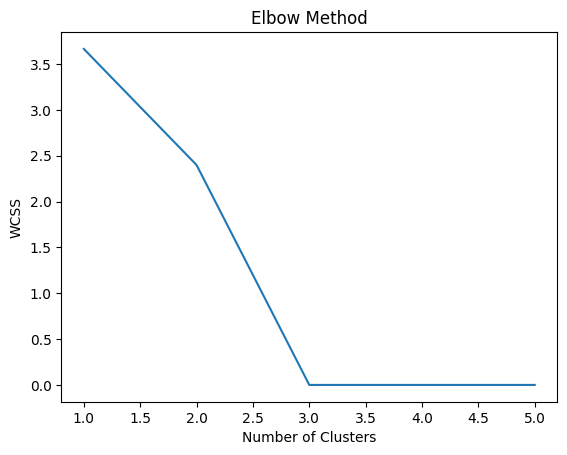

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Convert list of lists into a 2D array
all_top_vecs_array = np.zeros((len(all_top_vecs), lda_model.num_topics))
for doc_idx, doc_topics in enumerate(all_top_vecs):
    for topic, prob in doc_topics:
        all_top_vecs_array[doc_idx, topic] = prob

# Check the shape of the array
print("Shape of all_top_vecs_array:", all_top_vecs_array.shape)

# Initialize an empty list to store WCSS values
wcss = []

# Try different numbers of clusters
max_clusters = 5
for num_clusters in range(1, max_clusters + 1):
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(all_top_vecs_array)

    
    # Compute within-cluster sum of squares (WCSS)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()



In [44]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 3

# Initialize KMeans with the determined number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the document vectors
kmeans.fit(all_top_vecs_array)

# Get the cluster labels for each document
cluster_labels = kmeans.labels_

# Print which documents belong to each cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    for doc_idx, label in enumerate(cluster_labels):
        if label == cluster_num:
            print(f"Document {doc_idx + 1}")
    print()


Cluster 0:
Document 3
Document 4
Document 6

Cluster 1:
Document 1
Document 2

Cluster 2:
Document 5

